In [54]:
# This function should open a data file in csv, and transform it into a usable format
import pandas as pd
def load_data():
    dataset = pd.read_csv('student.csv')
    label_p = dataset["Grade"] #Label is the value or a target which I have to aim to predict in this classifier
    features_p = dataset.iloc[:,0:29] #Features of the dataset is split with .iloc function in Pandas
    
    #Converting the string values to numberic with refernce to their frequency 
    
    numeric_features_p = features_p.apply(lambda feature: pd.factorize(feature)[0])
    numeric_labels_p = pd.factorize(label_p)[0]
    dataset.iloc[:,0:29] = numeric_features_p
    dataset["Grade"] = numeric_labels_p
    
    #the Data are converted numeric values accroding to their occurence in the dataset
    
    return dataset

In [55]:
# This function should split a data set into a training set and hold-out test set
from sklearn.model_selection import train_test_split
def split_data(t_data):
    # The features and values are split into X=features y=values("Grade")
    X = load_data() 
    X_train, X_test = train_test_split(X,test_size=0.2,random_state = 0)
    if t_data == 'X_train':
        return X_train
    elif t_data == 'X_test':
        return X_test
    return 0    

In [56]:
# This function should build a supervised NB model     
def train(X):
    #the ds variable is stroing all the columns
    ds = X.iloc[:,0:29].columns
    ds_val =ds.values.tolist()
    df = []
    lis_val = []
    liklihood_val = []
    
    #As I know that there are 6 different class function in our lable.
    #I am going to count the total values of each class present in the label
    
    for x in range(6):
        k = X[X['Grade'] == x].count()
        k_val = k.values.tolist()
        lis_val.append(k_val[x])
    
    # Now I know the prior values of the lable and there count as well. 
    #Now I can find the Liklihood of the values by counting the values present in each attributes and getting 
    #the correct Grade value and the attribute values  
    
    
    for x in range(len(ds_val)):
        
        #alpha and M_val are used for laplace smoothing 
        
        M_val = len(set(X[ds_val[x]].values))
        alpha = 1 
        for m in range(len(set(X[ds_val[x]].values))):
            for y in range(6):
                df = X[(X['Grade'].values == y) & (X[ds_val[x]].values == m)].count()
                df_val = df.values.tolist()
                
                #Laplace Smoothing is applied to the values alpha and M_val, where alpha is 1 and M_val is the how much x attribute values can be taken
                
                val = float((alpha + df_val[y])/(M_val * lis_val[y]))
                liklihood_val.append([ds_val[x],m, y , val])
                # finally the liklihood values are returned from the fuction in a list of lists
    return liklihood_val


In [57]:
#Since train() function takes longer time to execte, I have stored these values in a list and I have stored the priors in a seperate list outside the train function to make it more useable 
train_val = train(split_data('X_train'))
lis_grade_count_val = []
priors_val = []
for x in range(6):
        grade_count = split_data('X_train')[split_data('X_train')['Grade'] == x].count()
        grade_count_val = grade_count.values.tolist()
        lis_grade_count_val.append(grade_count_val[x])
for y in range(len(lis_grade_count_val)):
    priors_val.append(lis_grade_count_val[y]/sum(lis_grade_count_val))

In [58]:
# This function should predict the class for an instance or a set of instances, based on a trained model 
def predict(Y):
    ls = Y.iloc[:,0:29].columns
    col_val = ls.values.tolist()
    lis_col_val = []
    lis_train_val = []
    fm = Y.iloc[:,0:29]
    fm_val = fm.values.tolist()
    test_values = []
    
    #It would be easier to compare the values in different list according to classess
    
    grade_0_lis = []
    grade_1_lis = []
    grade_2_lis = []
    grade_3_lis = []
    grade_4_lis = []
    grade_5_lis = []
    
    #predicting the test data
    
    for z in range(6):
        for x in range(len(fm_val)):
            mul_1_val = 1.0
            for y in range(len(col_val)):
                for m in range(len(train_val)):
                    if (col_val[y] == train_val[m][0]) & (fm_val[x][y] == train_val[m][1]) & (train_val[m][2] == z):
                        mul_1_val = mul_1_val * train_val[m][3]
            test_values.append([z,mul_1_val *  priors_val[z]])
    max_lis = []
    
    #Now I can store this predicted data according to each classes for comparision 
    
    for x in range(len(test_values)):
        if (test_values[x][0] == 0):
            grade_0_lis.append(test_values[x][1])
        elif (test_values[x][0] == 1):
            grade_1_lis.append(test_values[x][1])
        elif (test_values[x][0] == 2):
            grade_2_lis.append(test_values[x][1])
        elif (test_values[x][0] == 3):
            grade_3_lis.append(test_values[x][1])
        elif (test_values[x][0] == 4):
            grade_4_lis.append(test_values[x][1])
        elif (test_values[x][0] == 5):
            grade_5_lis.append(test_values[x][1])

            # comparing the data in each list accoring to there highest values and storing them in a list
            
    for y in range(len(grade_0_lis)):
        #max_val stores the max value from all the list which are stored in the Grade for each row
        max_val = max(grade_0_lis[y], grade_1_lis[y],grade_2_lis[y],grade_3_lis[y],grade_4_lis[y],grade_5_lis[y])
        if (max_val  == grade_0_lis[y]):
            max_lis.append(0)
        elif (max_val  == grade_1_lis[y]):
            max_lis.append(1)
        elif (max_val  == grade_2_lis[y]):
            max_lis.append(2)
        elif (max_val  == grade_3_lis[y]):
            max_lis.append(3)
        elif (max_val  == grade_4_lis[y]):
            max_lis.append(4)
        elif (max_val  == grade_5_lis[y]):
            max_lis.append(5)
            
# max_lis returns the predicted grade of the test data

    return max_lis

In [59]:
# This function should evaluate a set of predictions in terms of accuracy
def evaluate(Y):
    pre_test_val = predict(Y)
    actuall_test_val = []
    actuall_test = Y['Grade']
    actuall_test_val = actuall_test.values.tolist()
    pos = 0
    neg = 0
    lis_pos = []
    lis_neg = []
    for x in range(len(actuall_test_val)):
        if (actuall_test_val[x] == pre_test_val[x]):
            pos = pos + 1
            lis_pos.append(x)
        else:
            neg = neg +1
            lis_neg.append(x)
    val = set(Y.count())
    lis_val = list(val)
    accuracy = (pos/lis_val[0]) * 100
    return (round(accuracy,3))

In [60]:
evaluate(split_data('X_test'))

19.231

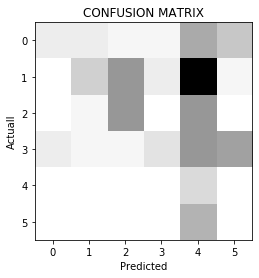

              precision    recall  f1-score   support

           0       0.50      0.10      0.16        21
           1       0.56      0.11      0.18        46
           2       0.46      0.48      0.47        23
           3       0.50      0.11      0.18        28
           4       0.06      1.00      0.11         4
           5       0.00      0.00      0.00         8

    accuracy                           0.19       130
   macro avg       0.35      0.30      0.18       130
weighted avg       0.47      0.19      0.21       130



In [61]:
# Question 2 B

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
actuall_test = split_data('X_test')['Grade']
actuall_test_val = actuall_test.values.tolist()
pre_test_val = predict(split_data('X_test'))

#creating a confusion matrix using the sklearn library

cf = confusion_matrix(actuall_test_val,pre_test_val)

#I am going to plot the matrix values in a graph to understand it better

plt.imshow(cf, cmap='binary', interpolation='None')
plt.title('CONFUSION MATRIX')
plt.xlabel('Predicted')
plt.ylabel('Actuall')
plt.show()

#I am going to retrieve all the information of the predicted and acctual values using the sklearn library

print(classification_report(actuall_test_val, pre_test_val, labels=[0, 1, 2, 3, 4, 5]))

In [62]:
def cross_validation():
    import pandas as pd
    from sklearn.model_selection import KFold
    import numpy as np
    from sklearn.metrics import accuracy_score
    from sklearn import tree
    import matplotlib.pyplot as plt
    import seaborn as sns
    X = load_data()
    # KFold Cross Validation approach
    kf = KFold(n_splits=5,shuffle=False)
    kf.split(X)    
    accuracy_list = []
    # Iterate over each train-test split
    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        train(X_train)
        train_val = train(X_train)
        lis_grade_count_val = []
        priors_val = []
        for x in range(6):
            grade_count = X_train[X_train['Grade'] == x].count()
            grade_count_val = grade_count.values.tolist()
            lis_grade_count_val.append(grade_count_val[x])
        for y in range(len(lis_grade_count_val)):
            priors_val.append(lis_grade_count_val[y]/sum(lis_grade_count_val))
    
        predict(X_test)
        accuracy_list.append(evaluate(X_test))

    return (accuracy_list)

In [63]:
cross_validation()

[23.077, 23.846, 26.154, 21.538, 30.233]